In [3]:
image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
images = [f for f in os.listdir(image_folder) if f.endswith('.gif') or f.endswith('.jpg')]

if not images:
    print("Aucune image trouvée dans le dossier.")
else:
    print(f"Images trouvées : {images}")


Images trouvées : ['apple-5.gif', 'bell-3.gif', 'camel-1.gif', 'bell-2.gif', 'apple-4.gif', 'camel-3.gif', 'camel-2.gif', 'bell-1.gif', 'apple-3.gif', 'bell-5.gif', 'bell-4.gif', 'apple-2.gif', 'camel-5.gif', 'camel-4.gif', 'apple-1.gif', 'bird-7.gif', 'bird-8.gif', 'bird-14.gif', 'device0-5.gif', 'device0-4.gif', 'bird-15.gif', 'device0-1.gif', 'device0-3.gif', 'device0-2.gif', 'bird-13.gif']


In [2]:
import cv2
import numpy as np
import os
import json
from PIL import Image

def calculate_hu_moments_from_gif(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')
    image = np.array(img_pil)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    largest_contour = max(contours, key=lambda cnt: len(cnt))
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def compare_hu_moments(hu1, hu2):
    return np.linalg.norm(hu1 - hu2)

def similarity_to_percentage(distance, max_distance):
    similarity = 1 - (distance / max_distance)
    return similarity * 100

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
images = [f for f in os.listdir(image_folder) if f.endswith('.gif')]

if not images:
    print("Aucune image trouvée dans le dossier.")
else:
    print(f"Images trouvées : {images}")

hu_moments_list = []
for image_name in images:
    image_path = os.path.join(image_folder, image_name)
    hu_moments = calculate_hu_moments_from_gif(image_path)
    if hu_moments is not None:
        hu_moments_list.append((image_name, hu_moments))

similarities = []
max_distance = 0

for i in range(len(hu_moments_list)):
    for j in range(i + 1, len(hu_moments_list)):
        image1, hu1 = hu_moments_list[i]
        image2, hu2 = hu_moments_list[j]
        distance = compare_hu_moments(hu1, hu2)
        if distance > max_distance:
            max_distance = distance
        similarity_percentage = similarity_to_percentage(distance, max_distance)
        similarities.append({
            'image1': image1,
            'image2': image2,
            'similarity': similarity_percentage
        })

output_file = 'similarities.json'
with open(output_file, 'w') as f:
    json.dump(similarities, f, indent=4)

print(f"Les résultats de similarité ont été sauvegardés dans '{output_file}'.")


Images trouvées : ['apple-5.gif', 'bell-3.gif', 'camel-1.gif', 'bell-2.gif', 'apple-4.gif', 'camel-3.gif', 'camel-2.gif', 'bell-1.gif', 'apple-3.gif', 'bell-5.gif', 'bell-4.gif', 'apple-2.gif', 'camel-5.gif', 'camel-4.gif', 'apple-1.gif', 'bird-7.gif', 'bird-8.gif', 'bird-14.gif', 'device0-5.gif', 'device0-4.gif', 'bird-15.gif', 'device0-1.gif', 'device0-3.gif', 'device0-2.gif', 'bird-13.gif']
Les résultats de similarité ont été sauvegardés dans 'similarities.json'.


In [5]:
import cv2
import numpy as np
import os
import json
from PIL import Image

def calculate_hu_moments_from_gif(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')
    image = np.array(img_pil)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    largest_contour = max(contours, key=lambda cnt: len(cnt))
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def compare_hu_moments(hu1, hu2):
    return np.linalg.norm(hu1 - hu2)

def similarity_to_percentage(distance, max_distance):
    similarity = 1 - (distance / max_distance)
    return similarity * 100

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
images = [f for f in os.listdir(image_folder) if f.endswith('.gif')]

if not images:
    print("Aucune image trouvée dans le dossier.")
else:
    print(f"Images trouvées : {images}")

hu_moments_list = []
for image_name in images:
    image_path = os.path.join(image_folder, image_name)
    hu_moments = calculate_hu_moments_from_gif(image_path)
    if hu_moments is not None:
        hu_moments_list.append((image_name, hu_moments))

similarities = []
max_distance = 0

for i in range(len(hu_moments_list)):
    for j in range(i + 1, len(hu_moments_list)):
        image1, hu1 = hu_moments_list[i]
        image2, hu2 = hu_moments_list[j]
        distance = compare_hu_moments(hu1, hu2)
        if distance > max_distance:
            max_distance = distance
        similarity_percentage = similarity_to_percentage(distance, max_distance)
        similarities.append({
            'image1': image1,
            'image2': image2,
            'similarity': similarity_percentage
        })

output_file = 'similarities.json'
with open(output_file, 'w') as f:
    json.dump(similarities, f, indent=4)

print(f"Les résultats de similarité ont été sauvegardés dans '{output_file}'.")

max_similarity_per_image = {}
for similarity in similarities:
    image1 = similarity['image1']
    image2 = similarity['image2']
    similarity_percentage = similarity['similarity']
    
    if image1 not in max_similarity_per_image:
        max_similarity_per_image[image1] = (image2, similarity_percentage)
    else:
        if similarity_percentage > max_similarity_per_image[image1][1]:
            max_similarity_per_image[image1] = (image2, similarity_percentage)
    
    if image2 not in max_similarity_per_image:
        max_similarity_per_image[image2] = (image1, similarity_percentage)
    else:
        if similarity_percentage > max_similarity_per_image[image2][1]:
            max_similarity_per_image[image2] = (image1, similarity_percentage)
for image_name, (most_similar_image, similarity_score) in max_similarity_per_image.items():
    print(f"Image: {image_name}")
    print(f"  Plus similaire à: {most_similar_image} avec un score de similarité de: {similarity_score:.2f}%")


Images trouvées : ['apple-5.gif', 'bell-3.gif', 'camel-1.gif', 'bell-2.gif', 'apple-4.gif', 'camel-3.gif', 'camel-2.gif', 'bell-1.gif', 'apple-3.gif', 'bell-5.gif', 'bell-4.gif', 'apple-2.gif', 'camel-5.gif', 'camel-4.gif', 'apple-1.gif', 'bird-7.gif', 'bird-8.gif', 'bird-14.gif', 'device0-5.gif', 'device0-4.gif', 'bird-15.gif', 'device0-1.gif', 'device0-3.gif', 'device0-2.gif', 'bird-13.gif']
Les résultats de similarité ont été sauvegardés dans 'similarities.json'.
Image: apple-5.gif
  Plus similaire à: apple-3.gif avec un score de similarité de: 99.38%
Image: bell-3.gif
  Plus similaire à: bell-1.gif avec un score de similarité de: 98.50%
Image: camel-1.gif
  Plus similaire à: camel-3.gif avec un score de similarité de: 94.65%
Image: bell-2.gif
  Plus similaire à: bell-1.gif avec un score de similarité de: 99.58%
Image: apple-4.gif
  Plus similaire à: apple-3.gif avec un score de similarité de: 99.82%
Image: camel-3.gif
  Plus similaire à: device0-2.gif avec un score de similarité de

In [2]:
import cv2
import numpy as np
import os
import json
from PIL import Image

def calculate_hu_moments_from_gif(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')
    image = np.array(img_pil)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    largest_contour = max(contours, key=lambda cnt: len(cnt))
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-6)
    return hu_moments

def compare_hu_moments(hu1, hu2):
    return np.linalg.norm(hu1 - hu2)

def similarity_to_percentage(distance, max_distance):
    similarity = 1 - (distance / max_distance)
    return similarity * 100

def get_top_n_similar_images(hu_moments_list, n=5):
    similarities = []
    max_distance = 0
    for i in range(len(hu_moments_list)):
        for j in range(i + 1, len(hu_moments_list)):
            image1, hu1 = hu_moments_list[i]
            image2, hu2 = hu_moments_list[j]
            distance = compare_hu_moments(hu1, hu2)
            max_distance = max(max_distance, distance)
            similarity_percentage = similarity_to_percentage(distance, max_distance)
            similarities.append({
                'image1': image1,
                'image2': image2,
                'similarity': similarity_percentage
            })
    
    similarities.sort(key=lambda x: x['similarity'], reverse=True)
    top_similar_images = {}
    
    for similarity in similarities:
        image1 = similarity['image1']
        image2 = similarity['image2']
        similarity_percentage = similarity['similarity']
        
        if image1 not in top_similar_images:
            top_similar_images[image1] = [(image2, similarity_percentage)]
        elif len(top_similar_images[image1]) < n:
            top_similar_images[image1].append((image2, similarity_percentage))
        elif similarity_percentage > min(top_similar_images[image1], key=lambda x: x[1])[1]:
            top_similar_images[image1].append((image2, similarity_percentage))
            top_similar_images[image1] = sorted(top_similar_images[image1], key=lambda x: x[1], reverse=True)[:n]

        if image2 not in top_similar_images:
            top_similar_images[image2] = [(image1, similarity_percentage)]
        elif len(top_similar_images[image2]) < n:
            top_similar_images[image2].append((image1, similarity_percentage))
        elif similarity_percentage > min(top_similar_images[image2], key=lambda x: x[1])[1]:
            top_similar_images[image2].append((image1, similarity_percentage))
            top_similar_images[image2] = sorted(top_similar_images[image2], key=lambda x: x[1], reverse=True)[:n]
    
    return top_similar_images

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
images = [f for f in os.listdir(image_folder) if f.endswith('.gif')]

if not images:
    print("Aucune image trouvée dans le dossier.")
else:
    print(f"Images trouvées : {images}")

hu_moments_list = []
for image_name in images:
    image_path = os.path.join(image_folder, image_name)
    hu_moments = calculate_hu_moments_from_gif(image_path)
    if hu_moments is not None:
        hu_moments_list.append((image_name, hu_moments))

top_similar_images = get_top_n_similar_images(hu_moments_list)

output_file = 'top_similar_images.json'
with open(output_file, 'w') as f:
    json.dump(top_similar_images, f, indent=4)

print(f"Les résultats de similarité ont été sauvegardés dans '{output_file}'.")


Images trouvées : ['apple-5.gif', 'bell-3.gif', 'camel-1.gif', 'bell-2.gif', 'apple-4.gif', 'camel-3.gif', 'camel-2.gif', 'bell-1.gif', 'apple-3.gif', 'bell-5.gif', 'bell-4.gif', 'apple-2.gif', 'camel-5.gif', 'camel-4.gif', 'apple-1.gif', 'bird-7.gif', 'bird-8.gif', 'bird-14.gif', 'device0-5.gif', 'device0-4.gif', 'bird-15.gif', 'device0-1.gif', 'device0-3.gif', 'device0-2.gif', 'bird-13.gif']
Les résultats de similarité ont été sauvegardés dans 'top_similar_images.json'.


Images trouvées : ['apple-5.gif', 'bell-3.gif', 'camel-1.gif', 'bell-2.gif', 'apple-4.gif', 'camel-3.gif', 'camel-2.gif', 'bell-1.gif', 'apple-3.gif', 'bell-5.gif', 'bell-4.gif', 'apple-2.gif', 'camel-5.gif', 'camel-4.gif', 'apple-1.gif', 'bird-7.gif', 'bird-8.gif', 'bird-14.gif', 'device0-5.gif', 'device0-4.gif', 'bird-15.gif', 'device0-1.gif', 'device0-3.gif', 'device0-2.gif', 'bird-13.gif']
Les résultats de similarité ont été sauvegardés dans 'top_similar_images.json'.


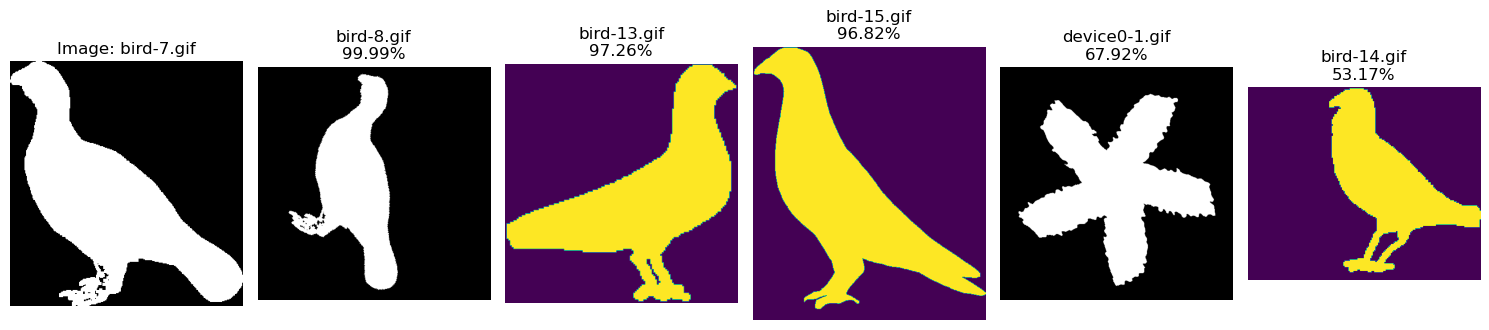

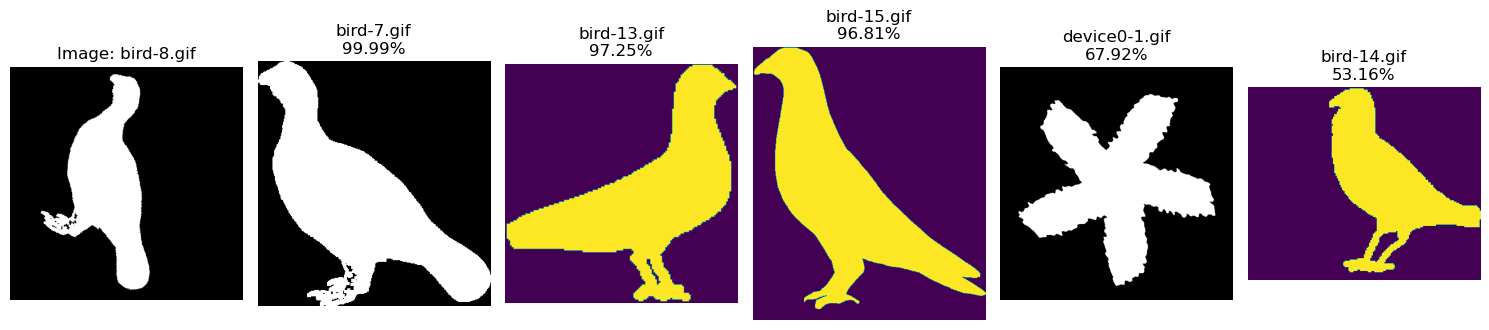

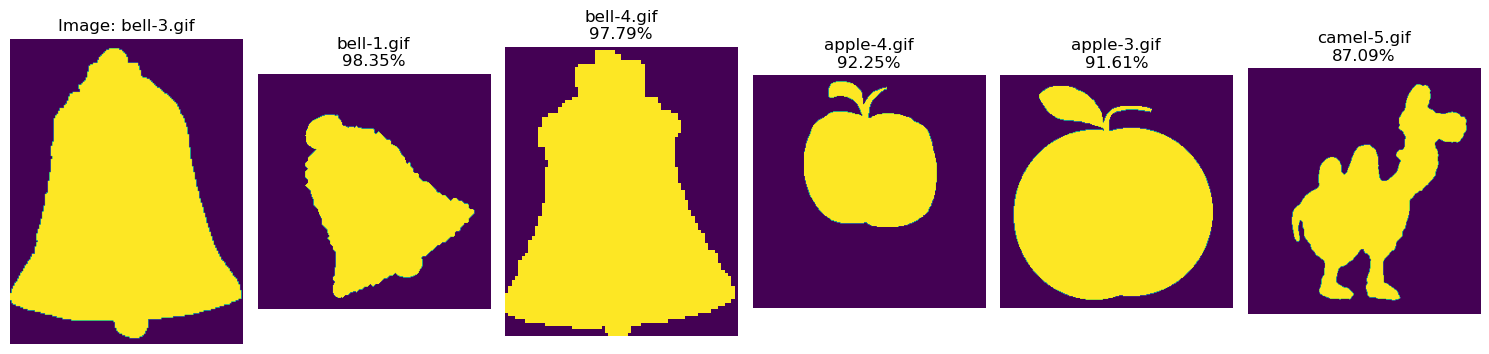

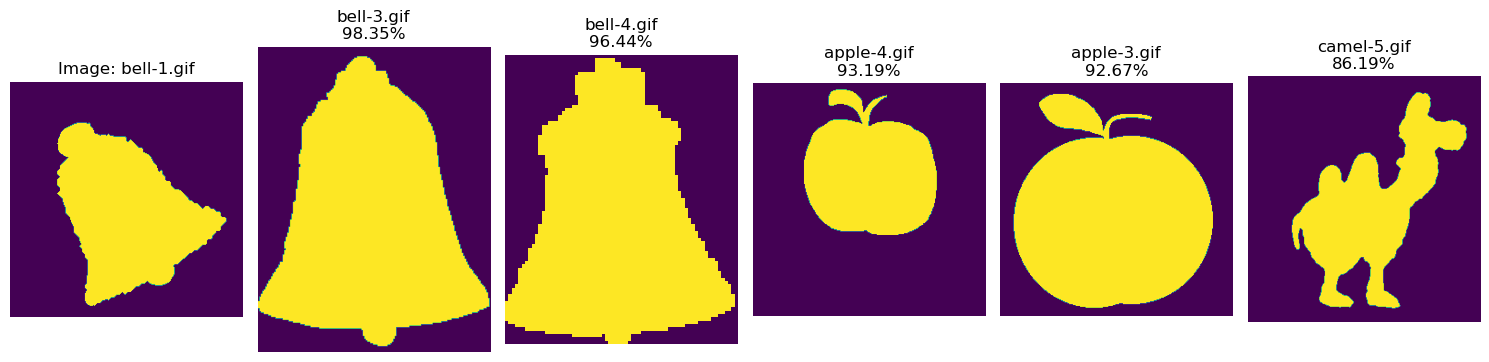

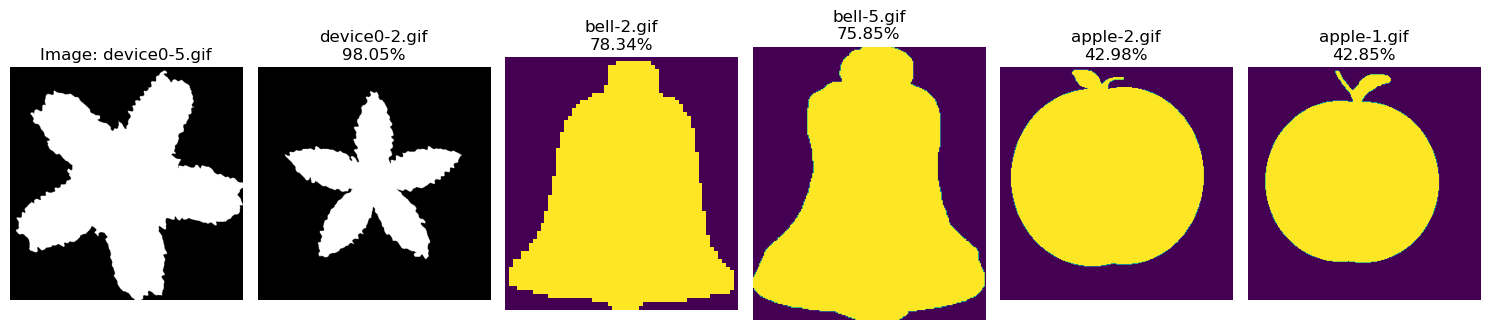

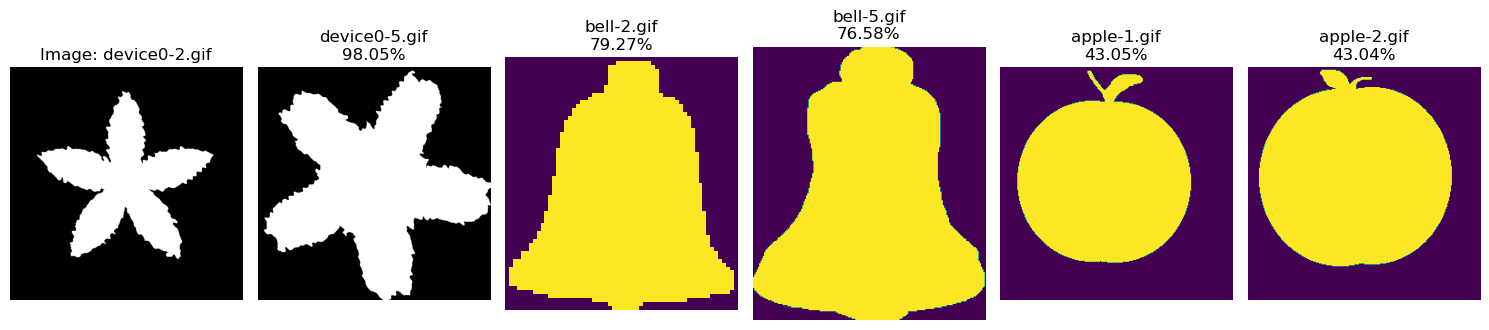

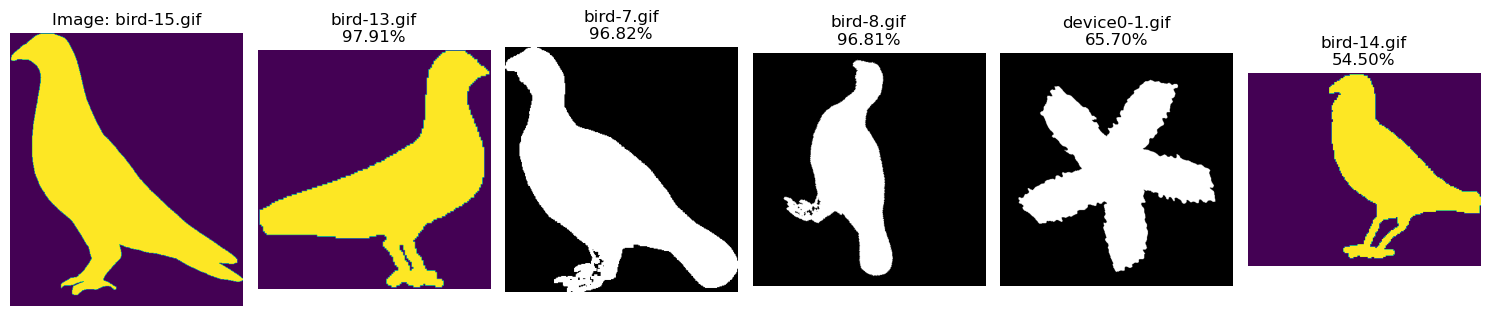

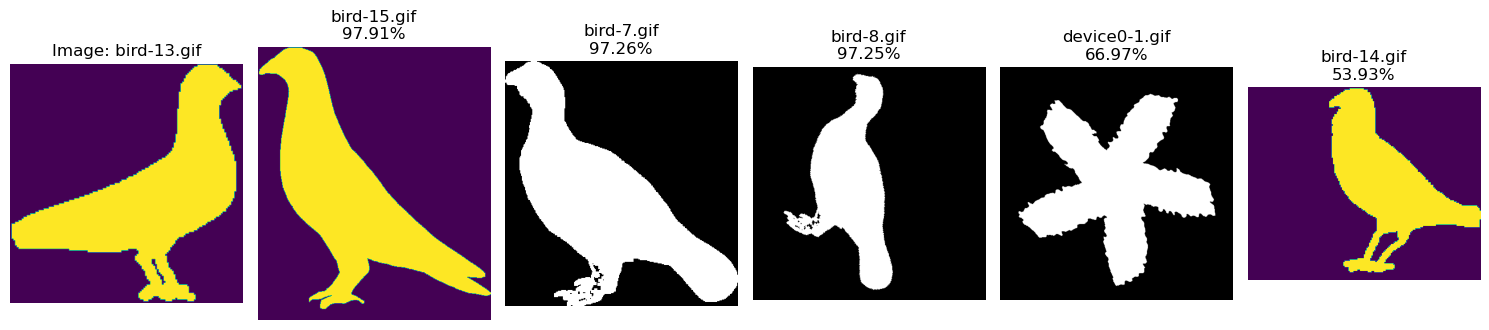

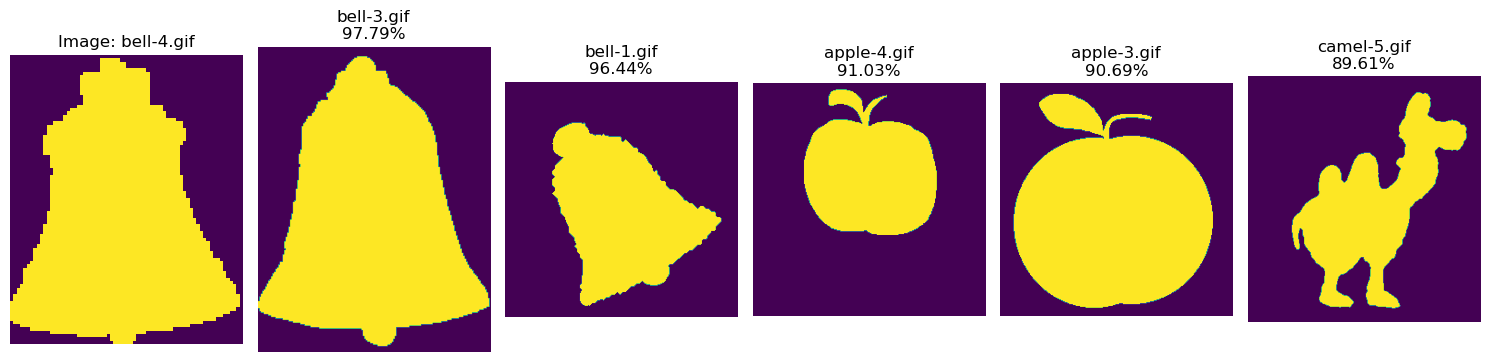

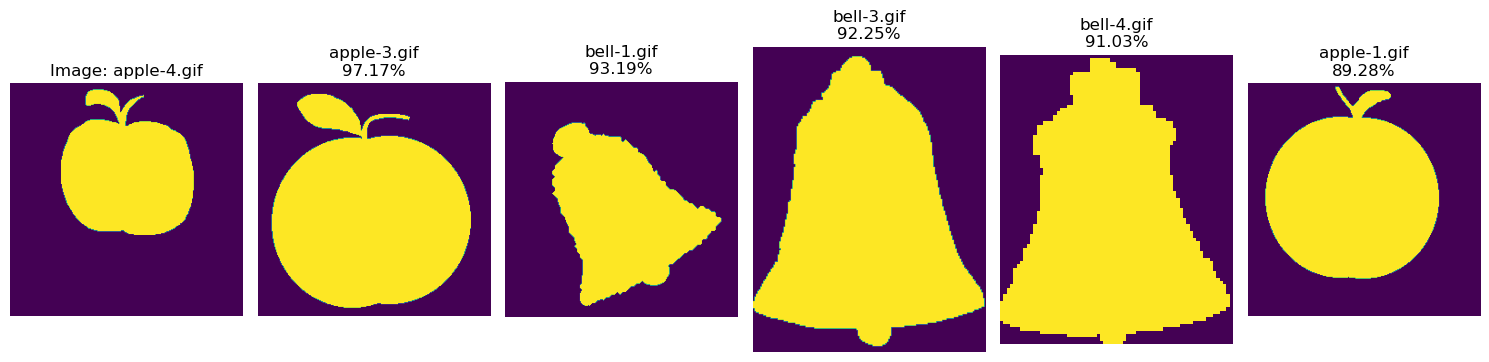

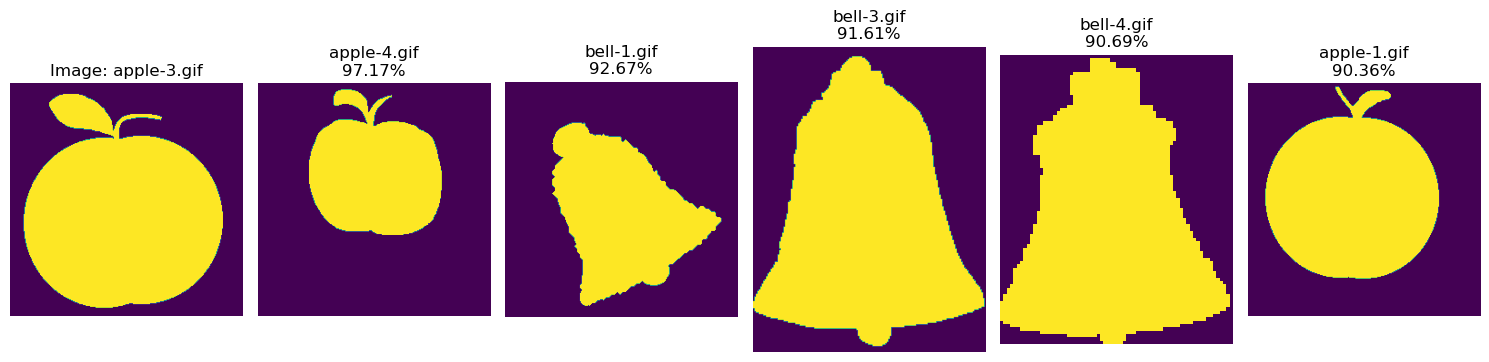

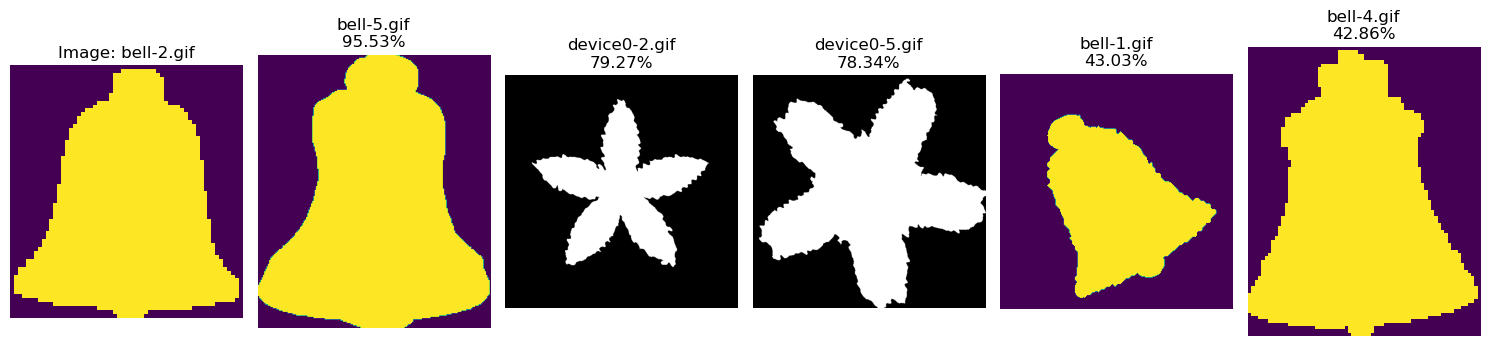

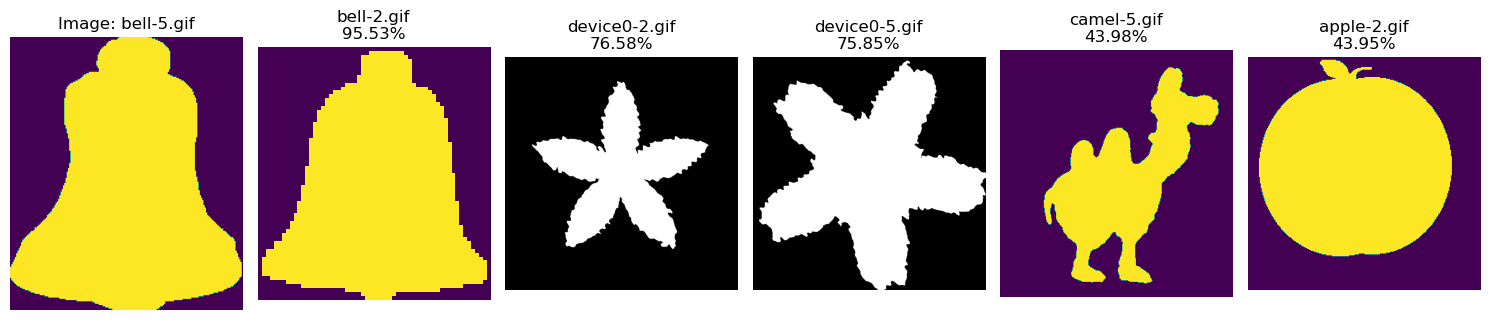

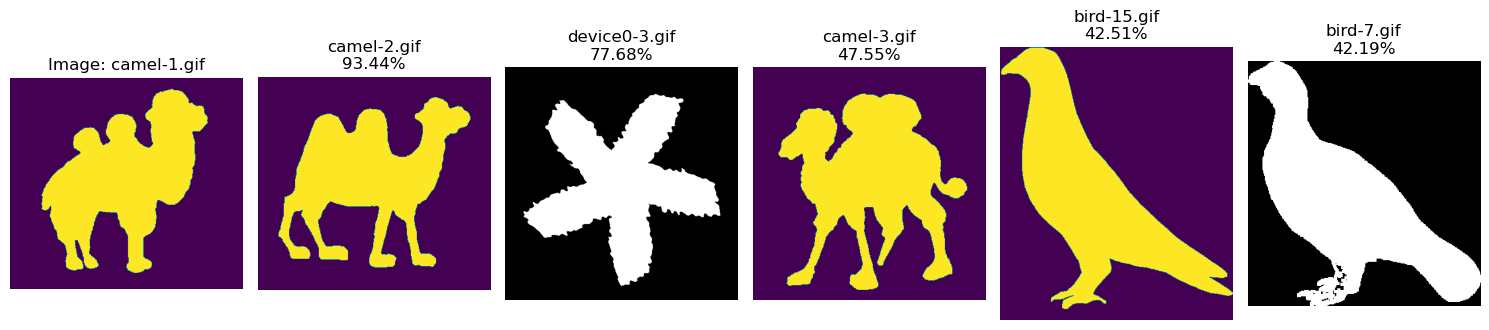

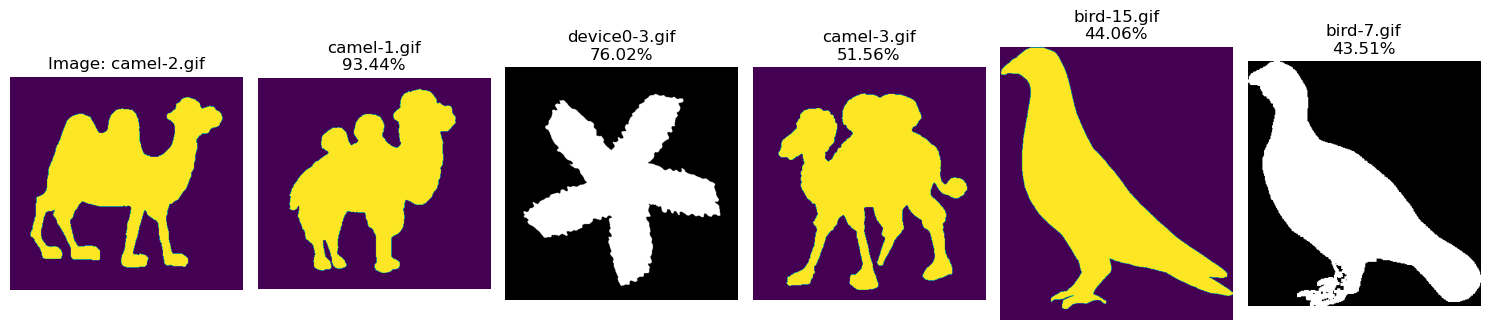

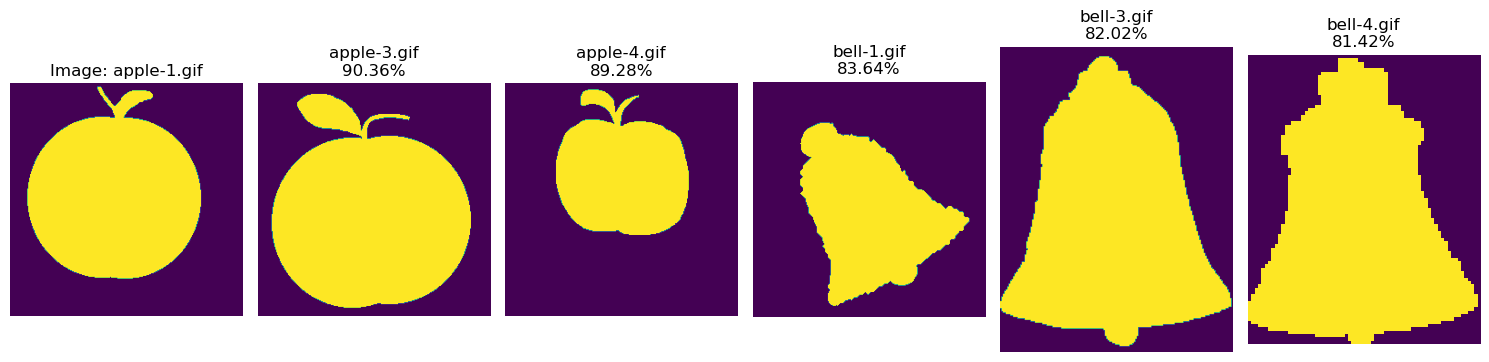

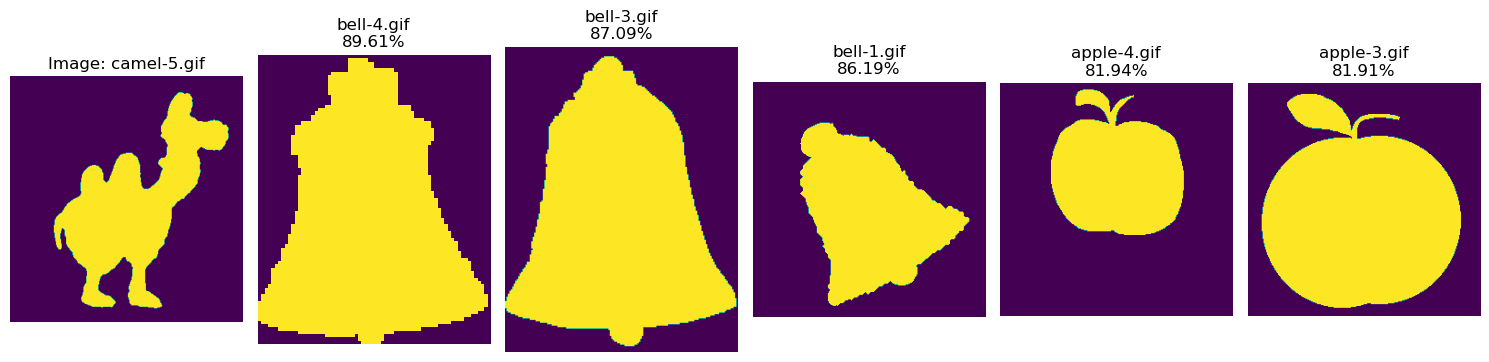

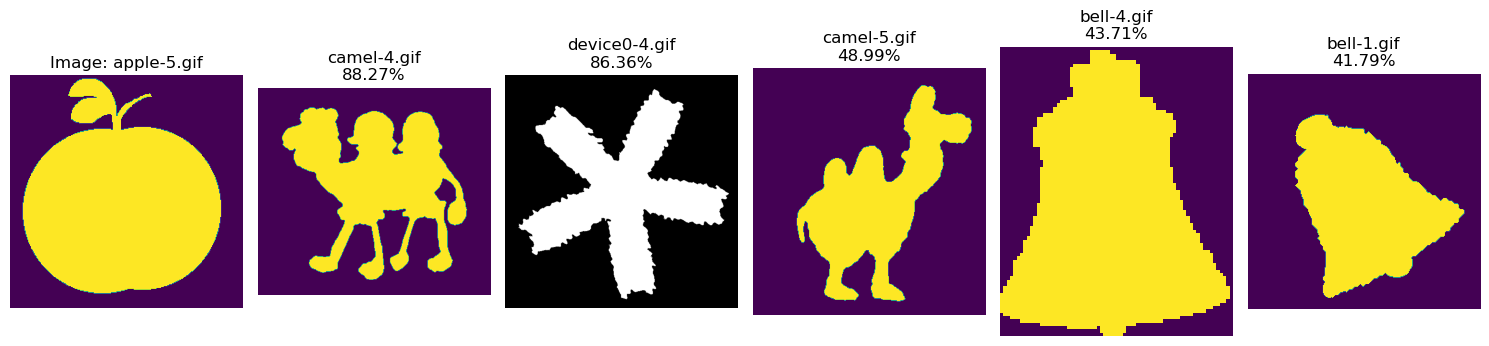

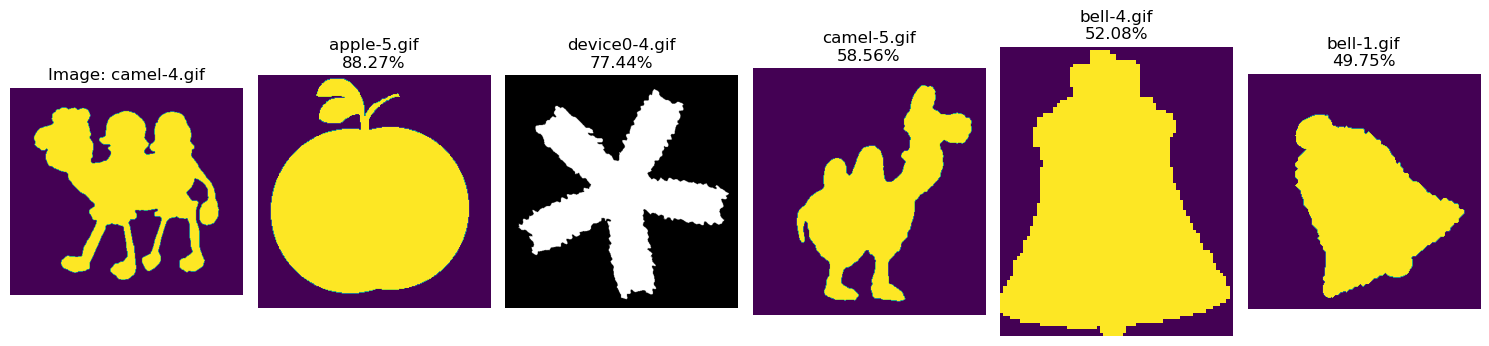

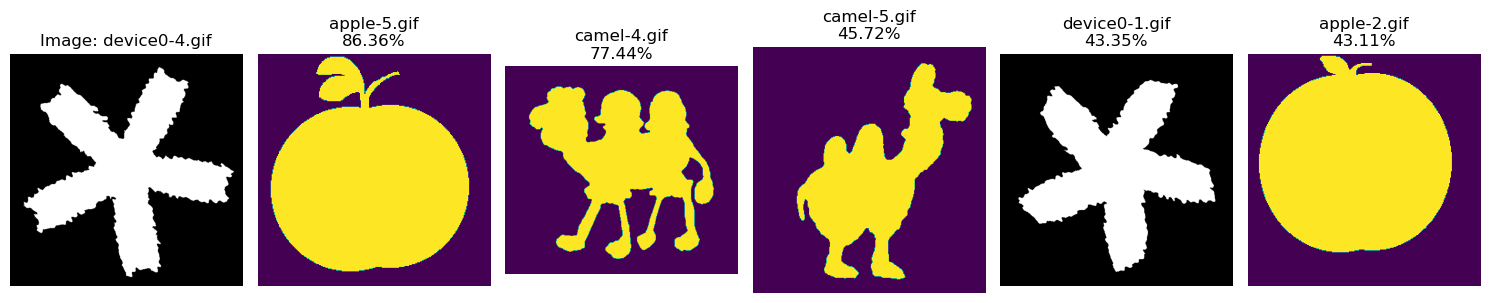

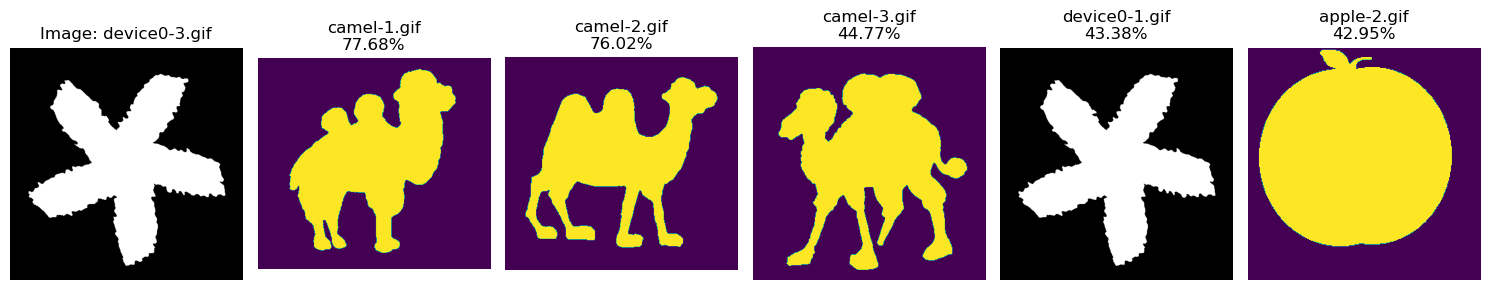

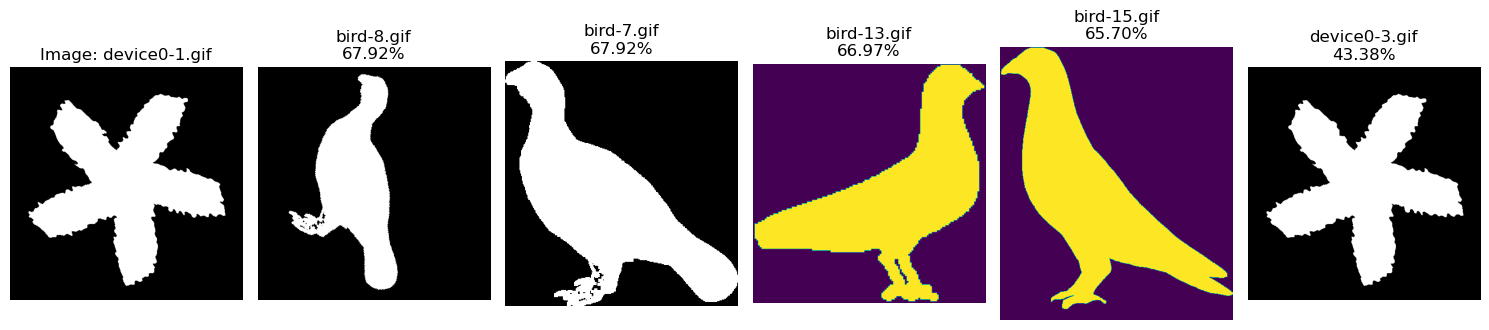

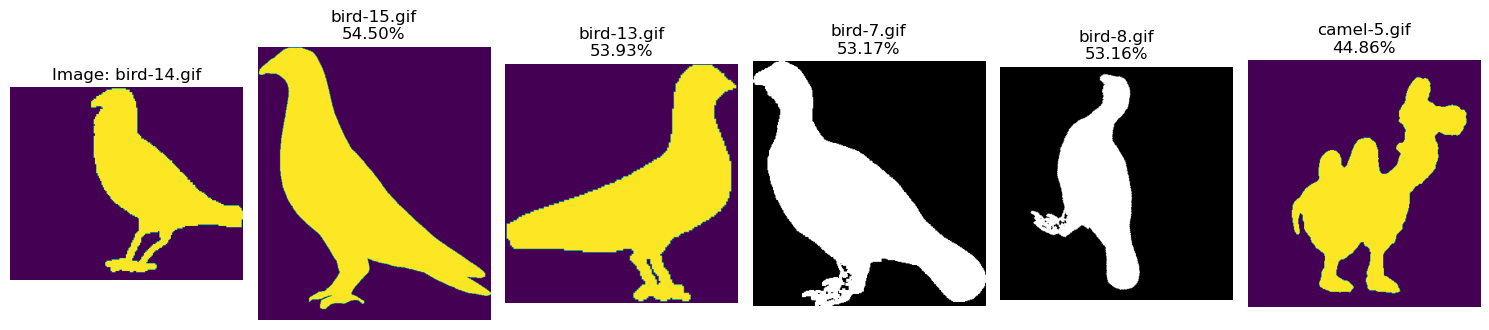

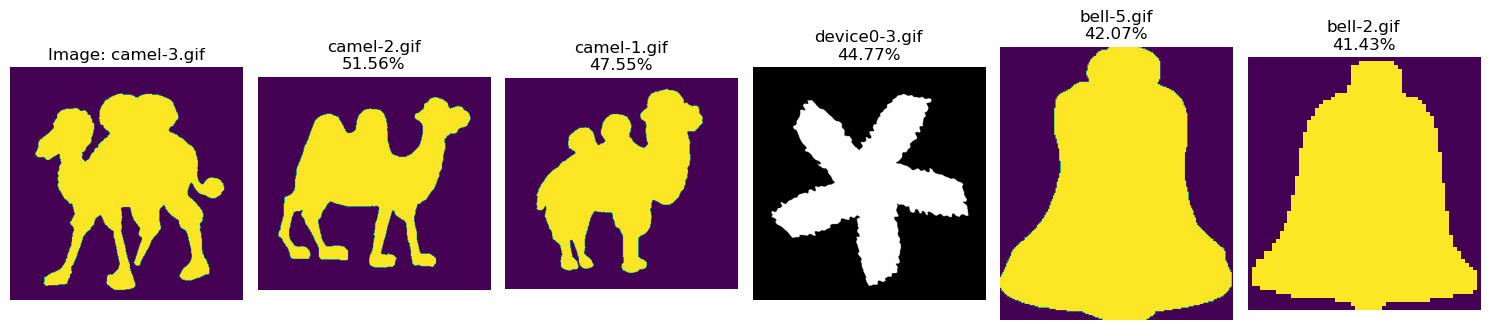

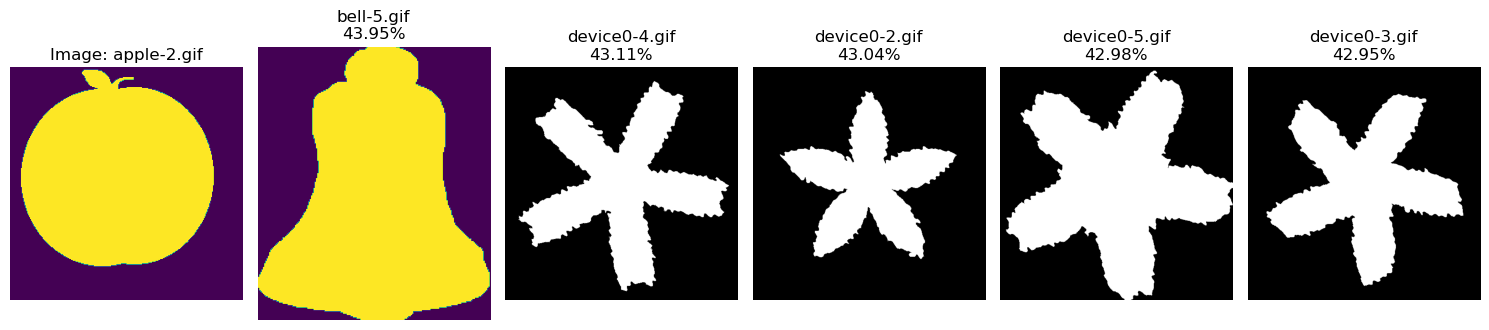

In [3]:
import cv2
import numpy as np
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

def calculate_hu_moments_from_gif(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')
    image = np.array(img_pil)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    largest_contour = max(contours, key=lambda cnt: len(cnt))
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-6)
    return hu_moments

def compare_hu_moments(hu1, hu2):
    return np.linalg.norm(hu1 - hu2)

def similarity_to_percentage(distance, max_distance):
    similarity = 1 - (distance / max_distance)
    return similarity * 100

def get_top_n_similar_images(hu_moments_list, n=5):
    similarities = []
    max_distance = 0
    for i in range(len(hu_moments_list)):
        for j in range(i + 1, len(hu_moments_list)):
            image1, hu1 = hu_moments_list[i]
            image2, hu2 = hu_moments_list[j]
            distance = compare_hu_moments(hu1, hu2)
            max_distance = max(max_distance, distance)
            similarity_percentage = similarity_to_percentage(distance, max_distance)
            similarities.append({
                'image1': image1,
                'image2': image2,
                'similarity': similarity_percentage
            })
    
    similarities.sort(key=lambda x: x['similarity'], reverse=True)
    top_similar_images = {}
    
    for similarity in similarities:
        image1 = similarity['image1']
        image2 = similarity['image2']
        similarity_percentage = similarity['similarity']
        
        if image1 not in top_similar_images:
            top_similar_images[image1] = [(image2, similarity_percentage)]
        elif len(top_similar_images[image1]) < n:
            top_similar_images[image1].append((image2, similarity_percentage))
        elif similarity_percentage > min(top_similar_images[image1], key=lambda x: x[1])[1]:
            top_similar_images[image1].append((image2, similarity_percentage))
            top_similar_images[image1] = sorted(top_similar_images[image1], key=lambda x: x[1], reverse=True)[:n]

        if image2 not in top_similar_images:
            top_similar_images[image2] = [(image1, similarity_percentage)]
        elif len(top_similar_images[image2]) < n:
            top_similar_images[image2].append((image1, similarity_percentage))
        elif similarity_percentage > min(top_similar_images[image2], key=lambda x: x[1])[1]:
            top_similar_images[image2].append((image1, similarity_percentage))
            top_similar_images[image2] = sorted(top_similar_images[image2], key=lambda x: x[1], reverse=True)[:n]
    
    return top_similar_images

def plot_similar_images(image_folder, top_similar_images):
    for image_name, similar_images in top_similar_images.items():
        fig, axes = plt.subplots(1, len(similar_images) + 1, figsize=(15, 5))
        axes[0].imshow(Image.open(os.path.join(image_folder, image_name)))
        axes[0].set_title(f"Image: {image_name}")
        axes[0].axis('off')
        
        for idx, (similar_image, similarity_score) in enumerate(similar_images):
            axes[idx + 1].imshow(Image.open(os.path.join(image_folder, similar_image)))
            axes[idx + 1].set_title(f"{similar_image}\n{similarity_score:.2f}%")
            axes[idx + 1].axis('off')
        
        plt.tight_layout()
        plt.show()

image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
images = [f for f in os.listdir(image_folder) if f.endswith('.gif')]

if not images:
    print("Aucune image trouvée dans le dossier.")
else:
    print(f"Images trouvées : {images}")

hu_moments_list = []
for image_name in images:
    image_path = os.path.join(image_folder, image_name)
    hu_moments = calculate_hu_moments_from_gif(image_path)
    if hu_moments is not None:
        hu_moments_list.append((image_name, hu_moments))

top_similar_images = get_top_n_similar_images(hu_moments_list)

output_file = 'top_similar_images.json'
with open(output_file, 'w') as f:
    json.dump(top_similar_images, f, indent=4)

print(f"Les résultats de similarité ont été sauvegardés dans '{output_file}'.")

plot_similar_images(image_folder, top_similar_images)


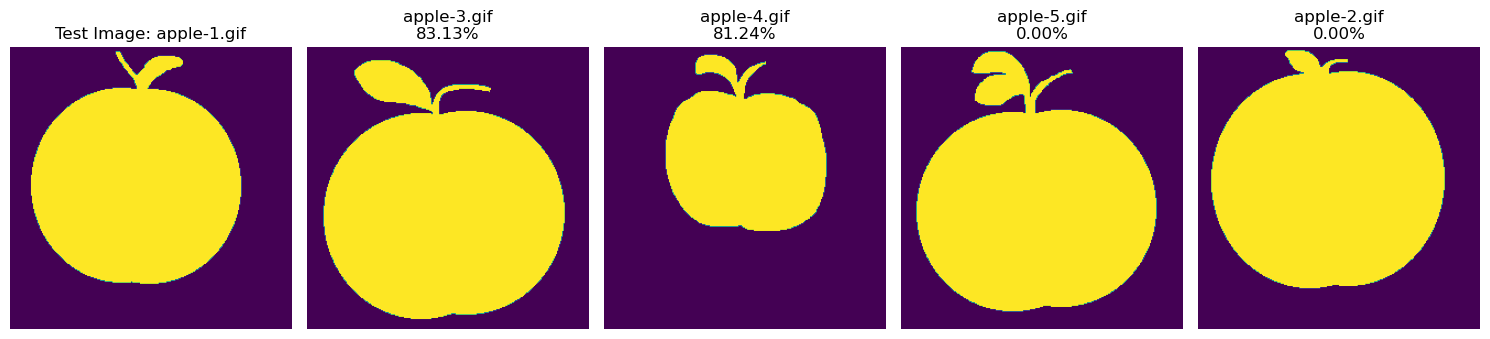

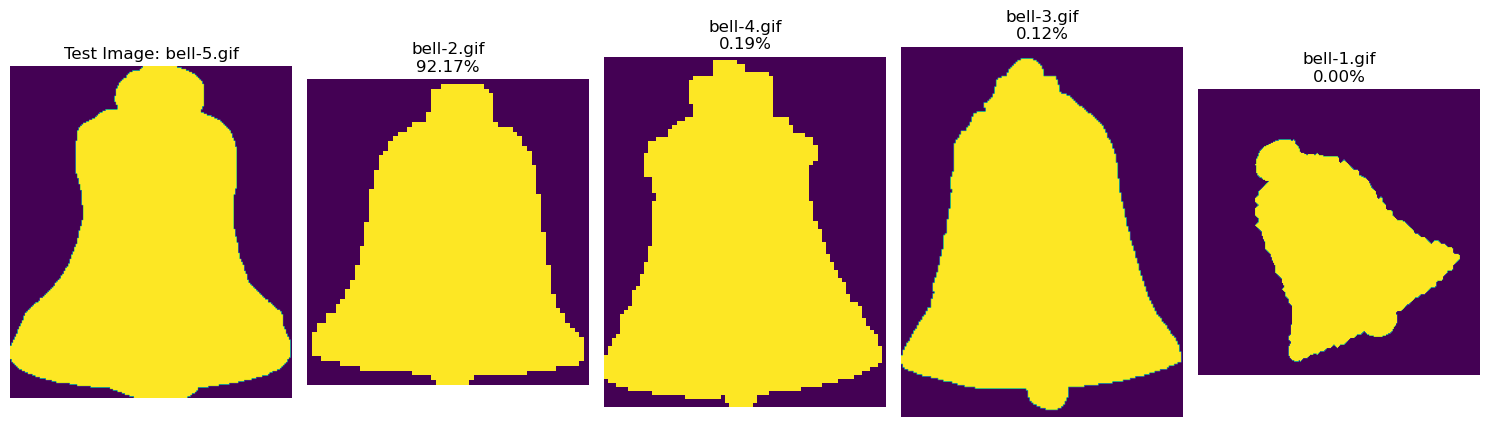

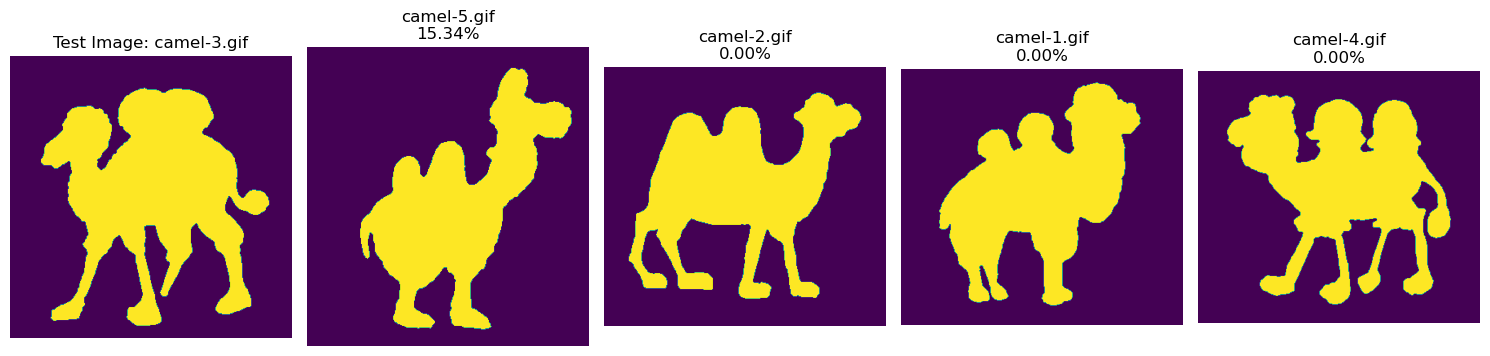

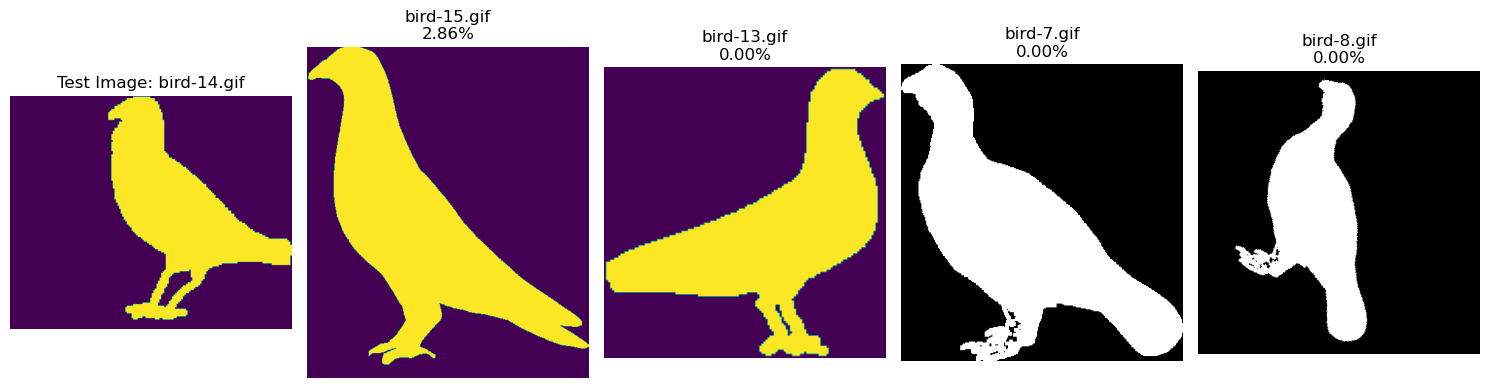

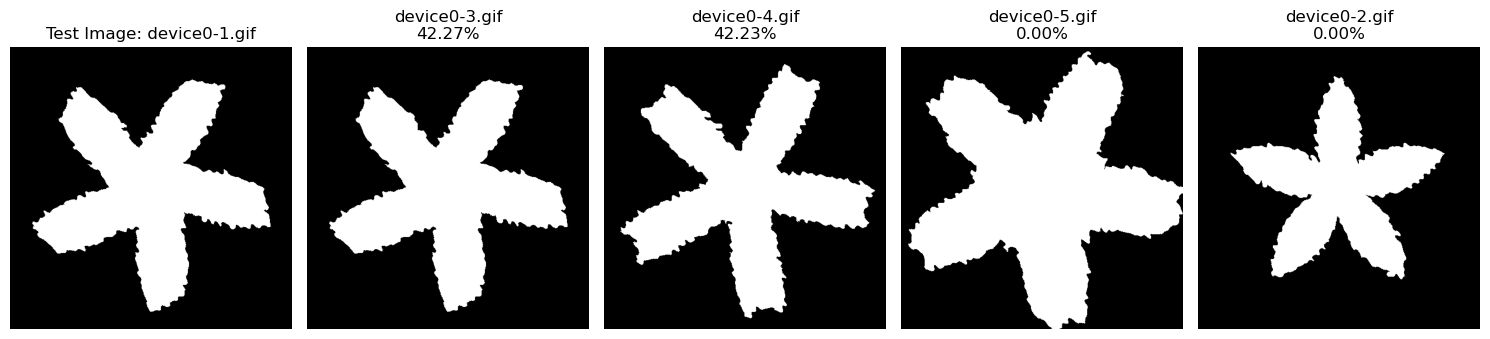

Results have been saved to 'test_image_similarities.json'.


In [5]:
import cv2
import numpy as np
import os
import json
import random
from PIL import Image
import matplotlib.pyplot as plt

def calculate_hu_moments_from_gif(image_path):
    img_pil = Image.open(image_path)
    img_pil = img_pil.convert('L')
    image = np.array(img_pil)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None
    largest_contour = max(contours, key=lambda cnt: len(cnt))
    moments = cv2.moments(largest_contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-6)
    return hu_moments

def compare_hu_moments(hu1, hu2):
    return np.linalg.norm(hu1 - hu2)

def similarity_to_percentage(distance, max_distance):
    similarity = 1 - (distance / max_distance)
    return similarity * 100

def get_top_n_similar_images(hu_moments_list, test_image, n=5):
    similarities = []
    max_distance = 0
    for image_name, hu in hu_moments_list:
        distance = compare_hu_moments(test_image, hu)
        max_distance = max(max_distance, distance)
        similarity_percentage = similarity_to_percentage(distance, max_distance)
        similarities.append({
            'image': image_name,
            'similarity': similarity_percentage
        })
    
    similarities.sort(key=lambda x: x['similarity'], reverse=True)
    return similarities[:n]

def plot_similar_images(image_folder, test_image_name, similar_images):
    fig, axes = plt.subplots(1, len(similar_images) + 1, figsize=(15, 5))
    
    # Plot test image
    axes[0].imshow(Image.open(os.path.join(image_folder, test_image_name)))
    axes[0].set_title(f"Test Image: {test_image_name}")
    axes[0].axis('off')
    
    # Plot top similar images
    for idx, similar_image in enumerate(similar_images):
        axes[idx + 1].imshow(Image.open(os.path.join(image_folder, similar_image['image'])))
        axes[idx + 1].set_title(f"{similar_image['image']}\n{similar_image['similarity']:.2f}%")
        axes[idx + 1].axis('off')
    
    plt.tight_layout()
    plt.show()

def organize_images(image_folder):
    classes = {}
    
    # Group images by class (assuming class names are the prefix of the file name)
    for filename in os.listdir(image_folder):
        if filename.endswith('.gif'):
            class_name = filename.split('-')[0]  # Assuming format like apple-1.gif
            if class_name not in classes:
                classes[class_name] = []
            classes[class_name].append(filename)
    
    return classes

# Main process
image_folder = '/Users/mac/Desktop/MST AISD/S3/mutimedia mining/multimedia-mining-indexing labs/lab7/Images'
classes = organize_images(image_folder)

train_test_split = {}
hu_moments_list = {}

# Step 1: Split images into train and test, and calculate Hu moments
for class_name, images in classes.items():
    random.shuffle(images)  # Shuffle images to ensure randomness
    train_images = images[:4]  # First 4 for training
    test_image = images[4]    # Last one for testing
    
    # Save train and test splits
    train_test_split[class_name] = {'train': train_images, 'test': test_image}
    
    # Compute Hu moments for training images
    hu_moments_list[class_name] = []
    for image_name in train_images + [test_image]:
        image_path = os.path.join(image_folder, image_name)
        hu_moments = calculate_hu_moments_from_gif(image_path)
        if hu_moments is not None:
            hu_moments_list[class_name].append((image_name, hu_moments))

# Step 2: Compare Hu moments of test images with training images
similar_images_per_test = {}

for class_name, split in train_test_split.items():
    test_image_name = split['test']
    test_image_path = os.path.join(image_folder, test_image_name)
    test_image_hu = next(hu for name, hu in hu_moments_list[class_name] if name == test_image_name)
    
    # Get top 5 most similar images for the test image
    top_similar_images = get_top_n_similar_images(hu_moments_list[class_name][:4], test_image_hu)
    
    # Save results
    similar_images_per_test[test_image_name] = top_similar_images
    
    # Plot top 5 similar images
    plot_similar_images(image_folder, test_image_name, top_similar_images)

# Step 3: Save the results in a JSON file
output_file = 'test_image_similarities.json'
with open(output_file, 'w') as f:
    json.dump(similar_images_per_test, f, indent=4)

print(f"Results have been saved to '{output_file}'.")
